## Yelp Restaurant Reviews and Ratings Analysis
### Sprint1 - Data aquisition and exploration
#### By Steven Too Heng Kwee  - 304449

## Acquire data

### Loading packages for the project

In [1]:
# package imports - main: pandas numpy plotly textblob nltk wordcloud seaborn matplotlib
#basics
import numpy as np
import pandas as pd

#misc
import gc
import time
import warnings


#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

# graph viz
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go


#graph section
import networkx as nx
import heapq  # for getting top n number of things from list,dict


#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
warnings.filterwarnings("ignore")
pyo.init_notebook_mode()

%matplotlib inline

##### Loading pymongo package and creating a connection to local MongoDB server

In [16]:
# Loading pymongo. If not installed please run 'pip install pymongo' in Anaconda console
import pymongo
import re

In [3]:
from pymongo import MongoClient
from pprint import pprint

In [10]:
#connection to local MongoDB server
client = MongoClient('localhost', 27017)

#### Checking for avalable collections

In [31]:
#Accessing database 'bigdata'
db = client.bigdata
print(db.collection_names())

['reviews_2018', 'reviews_bulk', 'business_TO_R', 'business_TO', 'business']


Note: Due to resource imitation on the local pc, I will be using only segments of restaurant businesses in toronto and reviews they received in 2018. RAM required should be within 10GB 


#### Loading datasetset into Pandas dataframe

In [47]:
business = db.business_TO_R
review = db.reviews_2018

In [48]:
business = pd.DataFrame(list(business.find()))
review = pd.DataFrame(list(review.find()))

#### Merging business data with each review. Only reviews for restaurants in Toronto are kept 

In [49]:
#Keeping on only reviews for Categories 'Restaurants' and City 'Toronto' 
#inner join in python pandas
review = pd.merge(review, business, on='business_id', how='inner')

#### Module below is to enable code run without having a MondoDB platform storage.

##### Dataframes business and review are save into csv on GitHub at https://github.com/stoohengkwee/CSDA-1050F18S1/tree/master/StevenToo-304449/data.

##### To load data please download and unzip the csv files into the root folder and uncomment the dataload  section


In [53]:
# Saving files to csv and GitHug @ https://github.com/stoohengkwee/CSDA-1050F18S1/tree/master/StevenToo-304449/data
#business.to_csv('business_TO_R.csv', encoding='utf-8', index=False)
#review.to_csv('review_TO_R.csv', encoding='utf-8', index=False)

# Loading datsets
#business=pd.read_csv("business_TO_R.csv")
#review=pd.read_csv("review_TO_R.csv")

## Data Exploration
#### As mentionned above, dataset is an extract of Yelp databases for restaurant in Toronto and their reviews in 2018

In [55]:
#Checking business dataframe
business.head()

_id                  address  \
0  5d35fe507b7294043460c46f      1170 Queen Street W   
1  5d35fe507b7294043460c472      1051 Bloor Street W   
2  5d35fe507b7294043460c484       582 College Street   
3  5d35fe507b7294043460c4a5  619 Mount Pleasant Road   
4  5d35fe507b7294043460c4b2      1614 Queen Street E   

                                          attributes             business_id  \
0  {'WiFi': 'u'no'', 'BikeParking': 'True', 'Rest...  NDuUMJfrWk52RA-H-OtrpA   
1  {'BusinessParking': '{'garage': False, 'street...  SP_YXIEwkFPPl_9anCYmpQ   
2  {'Alcohol': 'u'full_bar'', 'Caters': 'False', ...  mlHC2XcU9Bows6cnYEmRgg   
3  {'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...  RFbMVekR8lU9tPJ8sWrwHg   
4  {'RestaurantsGoodForGroups': 'True', 'Restaura...  NPHZkn1e-tSJAbo8Zm9rYw   

                                          categories     city  \
0  Juice Bars & Smoothies, Food, Restaurants, Fas...  Toronto   
1  Restaurants, Nightlife, Breakfast & Brunch, Ve...  Toronto   
2  Restaurants, Breakfast & Brunch, Bars, Modern ...  Toronto   
3                               Italian, Restaurants  Toronto   
4                      Tex-Mex, Mexican, Restaurants  Toronto   

                                               hours  is_open   latitude  \
0  {'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...        1  43.642889   
1  {'Tuesday': '9:0-18:0', 'Wednesday': '9:0-18:0...        0  43.660494   
2  {'Thursday': '18:0-2:0', 'Friday': '18:0-2:0',...        0  43.655420   
3                                               None        1  43.704229   
4  {'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...        1  43.666181   

   longitude                   name postal_code  review_count  stars state  
0 -79.425429         Bolt Fresh Bar     M6J 1J5            57    3.0    ON  
1 -79.432099  The Steady Cafe & Bar     M6H 1M4            29    3.5    ON  
2 -79.413352     Mad Crush Wine Bar     M6G 1B3             9    4.0    ON  
3 -79.388230               Tavolino     M4S 2M5            18    4.0    ON  
4 -79.316468       Burrito Bandidos     M4L 1G4            43    3.5    ON

In [56]:
business.shape

(7965, 15)

In [57]:
#Checking review dataframe
review.head()

_id_x             business_id  cool  \
0  5d34af2f05c8a038caf1cb40  3a7Qby_IX7sU7O6ZsQZeOQ     0   
1  5d34af3605c8a038caf1dfe5  3a7Qby_IX7sU7O6ZsQZeOQ     1   
2  5d34af2505c8a038caf1a198  3a7Qby_IX7sU7O6ZsQZeOQ     0   
3  5d34af5205c8a038caf20309  3a7Qby_IX7sU7O6ZsQZeOQ     0   
4  5d34af6c05c8a038caf22ae0  3a7Qby_IX7sU7O6ZsQZeOQ     0   

                  date  funny               review_id  stars_x  \
0  2018-08-14 04:13:05      0  PB4wv1eNEGXh8QFQCMnd1g      4.0   
1  2018-01-22 00:02:19      0  mNjd9B7dVBGH5f_rKIRofg      4.0   
2  2018-03-15 19:09:56      2  n9B9XWtqYy1s-nyV6qnGwQ      4.0   
3  2018-10-03 23:13:59      0  hjSFsF9bxiRqf1OM73Gc7A      2.0   
4  2018-02-02 02:41:52      0  nxzG0S6v2hkBB9iYIFSVoQ      3.0   

                                                text  useful  \
0  The service here is impeccable. Our waitress w...       0   
1  Decided to come check out the furniture and se...       3   
2  My best friend and I came here to see what the...       4   
3  I went there for lunch today.  They've changed...       0   
4  All stars go to the decor and atmosphere of th...       3   

                  user_id  ...      city  \
0  CZqHG0JtP6pxK2ox7zpwVQ  ...   Toronto   
1  TFxeEvpjMNQ3AWL49iMwtA  ...   Toronto   
2  HxkWE8b1bJbSc4Ihmgy5dQ  ...   Toronto   
3  BV2TQDbbgC5Mwgyoh3CHDA  ...   Toronto   
4  Fsl7fnXttgugpoyuCJ0zkg  ...   Toronto   

                                               hours is_open   latitude  \
0  {'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ...       1  43.724684   
1  {'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ...       1  43.724684   
2  {'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ...       1  43.724684   
3  {'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ...       1  43.724684   
4  {'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ...       1  43.724684   

   longitude               name  postal_code  review_count  stars_y state  
0 -79.454173  RH Courtyard Cafe      M6A 2T9            82      4.0    ON  
1 -79.454173  RH Courtyard Cafe      M6A 2T9            82      4.0    ON  
2 -79.454173  RH Courtyard Cafe      M6A 2T9            82      4.0    ON  
3 -79.454173  RH Courtyard Cafe      M6A 2T9            82      4.0    ON  
4 -79.454173  RH Courtyard Cafe      M6A 2T9            82      4.0    ON  

[5 rows x 24 columns]

In [58]:
# Review count
review.shape

(57047, 24)


### Distribution of ratings according to Yelp

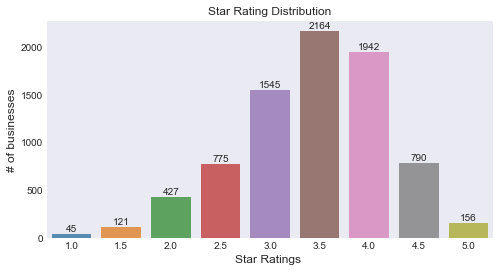

In [59]:
#Get the distribution of the ratings
x=business['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

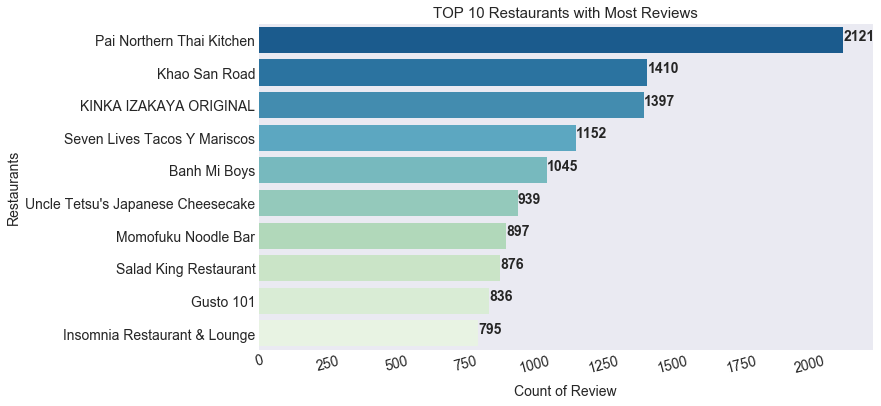

In [60]:
#Get Top 10 restaurants with most reviews
plt.figure(figsize=(11,6))
grouped = business[['name','review_count']].sort_values(by='review_count', ascending=False)[:10]
sns.barplot(x=grouped.review_count, y = grouped.name, palette=sns.color_palette("GnBu_r", len(grouped)), ci=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 10 Restaurants with Most Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)

### Distribution of ratings given by reviewers

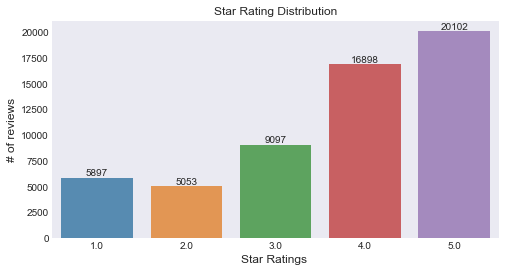

In [64]:
#Get the distribution of the ratings
x=review['stars_x'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of reviews', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

#### Compared to business ratings by Yelp, the mode stars is 3.5 with a normal distribution. However the users review ratings are mostly 4.0, 5.0 and notice the higher proportion of 1 star. Based on the reviews alone we can see the tendency by reviewers to over and under rate.    

#### Lets explore further

In [65]:
# Add column 'review_lenght'. Characters count of review 
review['review_length'] = review['text'].apply(len)

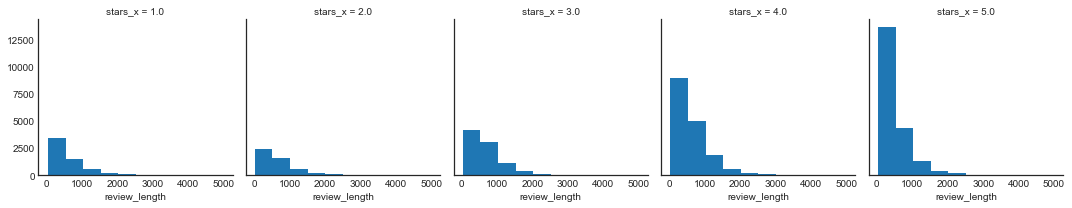

In [66]:
# Distribution of review lenght based on start rating
sns.set_style('white')
%matplotlib inline
g = sns.FacetGrid(review,col='stars_x')
g.map(plt.hist,'review_length')

#### Character count length is shorter for 4 and 5 stars indicating a higher rate weight and lack on information to justify the rate  


### General WordCloud

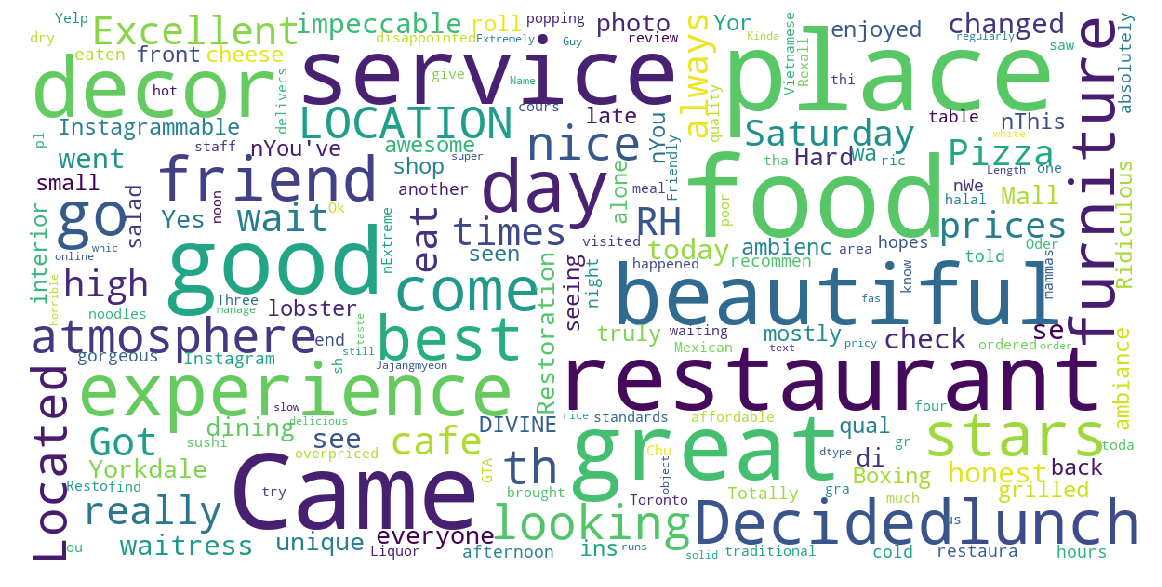

In [67]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(review["text"])



### Data clean on review
##### Create clean_text function
###### - lower the text
###### - tokenize the text (split the text into words) and remove the punctuation
###### - remove useless words that contain numbers
###### - remove useless stop words like ‘the’, ‘a’ ,’this’ etc.
###### - Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
###### - lemmatize the text: transform every word into their root form (e.g. restaurants -> restaurant, ate -> eat)


In [68]:
# Explore cleaning process

# Create clean_text function
#lower the text
#tokenize the text (split the text into words) and remove the punctuation
#remove useless words that contain numbers
#remove useless stop words like ‘the’, ‘a’ ,’this’ etc.
#Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
#lemmatize the text: transform every word into their root form (e.g. restaurants -> restaurant, ate -> eat)

import nltk
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

#### Adding a column with the cleaned up text

In [69]:
# Add column with clean_text data. Note: This step requires processing time.Patience... 
review['review_clean_text'] = review['text'].apply(lambda x: clean_text(x))

In [70]:
review.head()

_id_x             business_id  cool  \
0  5d34af2f05c8a038caf1cb40  3a7Qby_IX7sU7O6ZsQZeOQ     0   
1  5d34af3605c8a038caf1dfe5  3a7Qby_IX7sU7O6ZsQZeOQ     1   
2  5d34af2505c8a038caf1a198  3a7Qby_IX7sU7O6ZsQZeOQ     0   
3  5d34af5205c8a038caf20309  3a7Qby_IX7sU7O6ZsQZeOQ     0   
4  5d34af6c05c8a038caf22ae0  3a7Qby_IX7sU7O6ZsQZeOQ     0   

                  date  funny               review_id  stars_x  \
0  2018-08-14 04:13:05      0  PB4wv1eNEGXh8QFQCMnd1g      4.0   
1  2018-01-22 00:02:19      0  mNjd9B7dVBGH5f_rKIRofg      4.0   
2  2018-03-15 19:09:56      2  n9B9XWtqYy1s-nyV6qnGwQ      4.0   
3  2018-10-03 23:13:59      0  hjSFsF9bxiRqf1OM73Gc7A      2.0   
4  2018-02-02 02:41:52      0  nxzG0S6v2hkBB9iYIFSVoQ      3.0   

                                                text  useful  \
0  The service here is impeccable. Our waitress w...       0   
1  Decided to come check out the furniture and se...       3   
2  My best friend and I came here to see what the...       4   
3  I went there for lunch today.  They've changed...       0   
4  All stars go to the decor and atmosphere of th...       3   

                  user_id                        ...                          \
0  CZqHG0JtP6pxK2ox7zpwVQ                        ...                           
1  TFxeEvpjMNQ3AWL49iMwtA                        ...                           
2  HxkWE8b1bJbSc4Ihmgy5dQ                        ...                           
3  BV2TQDbbgC5Mwgyoh3CHDA                        ...                           
4  Fsl7fnXttgugpoyuCJ0zkg                        ...                           

  is_open   latitude  longitude               name postal_code review_count  \
0       1  43.724684 -79.454173  RH Courtyard Cafe     M6A 2T9           82   
1       1  43.724684 -79.454173  RH Courtyard Cafe     M6A 2T9           82   
2       1  43.724684 -79.454173  RH Courtyard Cafe     M6A 2T9           82   
3       1  43.724684 -79.454173  RH Courtyard Cafe     M6A 2T9           82   
4       1  43.724684 -79.454173  RH Courtyard Cafe     M6A 2T9           82   

   stars_y  state  review_length  \
0      4.0     ON            630   
1      4.0     ON            842   
2      4.0     ON           1449   
3      4.0     ON            238   
4      4.0     ON            348   

                                   review_clean_text  
0  service impeccable waitress attentive clear ta...  
1  decide come check furniture see hype absolutel...  
2  best friend come see hype get closer restauran...  
3  go lunch today they've change toast thick fluf...  
4  star go decor atmosphere cafe make feel like p...  

[5 rows x 26 columns]

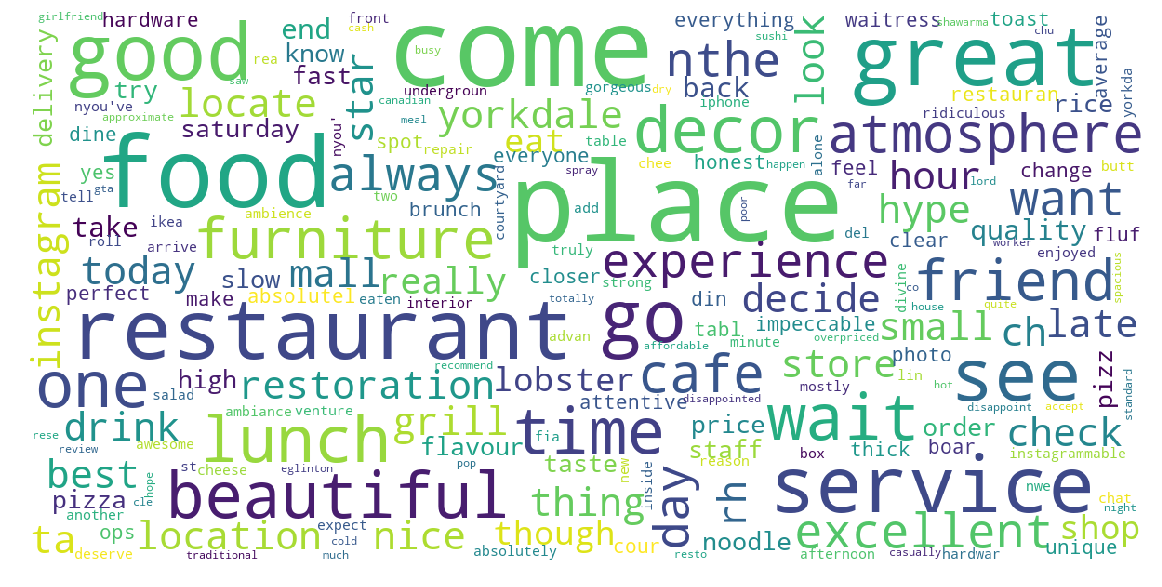

In [71]:
# print wordcloud
show_wordcloud(review["review_clean_text"])

### Lets separate and compare the good and the bad reviews

In [72]:
# Split review into good(4 and 5 stars) and bad (1 and 2 stars) 
review_bad = review[(review['stars_x'] <= 2.0)]
review_good = review[(review['stars_x'] >= 4.0)]

In [77]:
review_bad.head()

_id_x             business_id  cool  \
3   5d34af5205c8a038caf20309  3a7Qby_IX7sU7O6ZsQZeOQ     0   
10  5d34b08e05c8a038caf2fc9b  3a7Qby_IX7sU7O6ZsQZeOQ     0   
15  5d34b13705c8a038caf3852d  3a7Qby_IX7sU7O6ZsQZeOQ     6   
44  5d34b92105c8a038caf952da  3a7Qby_IX7sU7O6ZsQZeOQ     0   
72  5d34b5a605c8a038caf6c120  KN0gPRzDvA6uVYims2KA0w     0   

                   date  funny               review_id  stars_x  \
3   2018-10-03 23:13:59      0  hjSFsF9bxiRqf1OM73Gc7A      2.0   
10  2018-02-25 20:21:10      0  ccX43suxWX_NZNLXxBD_uQ      2.0   
15  2018-02-26 03:28:08      2  EubVfBy4mKVTa4dN7fGPuw      2.0   
44  2018-08-12 03:04:30      0  9iEi_5CLu7cptBtu7QbX8w      2.0   
72  2018-04-20 06:29:05      0  beKqgUcBBvdAD8ujuXmNJA      2.0   

                                                 text  useful  \
3   I went there for lunch today.  They've changed...       0   
10  Decor is nice. But that's about it. Food was b...       2   
15  So I have been seeing this place mostly on ins...      12   
44  Came here because all of the high reviews. \nD...       0   
72  Used to constantly go here, but a month later,...       0   

                   user_id                        ...                          \
3   BV2TQDbbgC5Mwgyoh3CHDA                        ...                           
10  zyg4-MFtfPWmwucVazSjfw                        ...                           
15  Z09rco1enQXNCd9H0u7kvg                        ...                           
44  Qd68Q4sllMiGKEkuFrmr0Q                        ...                           
72  4omSmj--1sLfRfRijg6kRg                        ...                           

   is_open   latitude  longitude                                name  \
3        1  43.724684 -79.454173                   RH Courtyard Cafe   
10       1  43.724684 -79.454173                   RH Courtyard Cafe   
15       1  43.724684 -79.454173                   RH Courtyard Cafe   
44       1  43.724684 -79.454173                   RH Courtyard Cafe   
72       1  43.788145 -79.329492  Rosemary & Thyme Family Restaurant   

   postal_code review_count  stars_y  state  review_length  \
3      M6A 2T9           82      4.0     ON            238   
10     M6A 2T9           82      4.0     ON            243   
15     M6A 2T9           82      4.0     ON            612   
44     M6A 2T9           82      4.0     ON            464   
72     M2J 4A8           34      4.0     ON            793   

                                    review_clean_text  
3   go lunch today they've change toast thick fluf...  
10  decor nice that's food average thing come boar...  
15  see place mostly instagram come check want rea...  
44  come high review \ndecor really nice food let ...  
72  use constantly go month later seem run everyth...  

[5 rows x 26 columns]

In [78]:
review_bad['stars_x'].value_counts()

1.0    5897
2.0    5053
Name: stars_x, dtype: int64

In [79]:
review_good['stars_x'].value_counts()

5.0    20102
4.0    16898
Name: stars_x, dtype: int64

### Comparing wordcloud between good and bad reviews

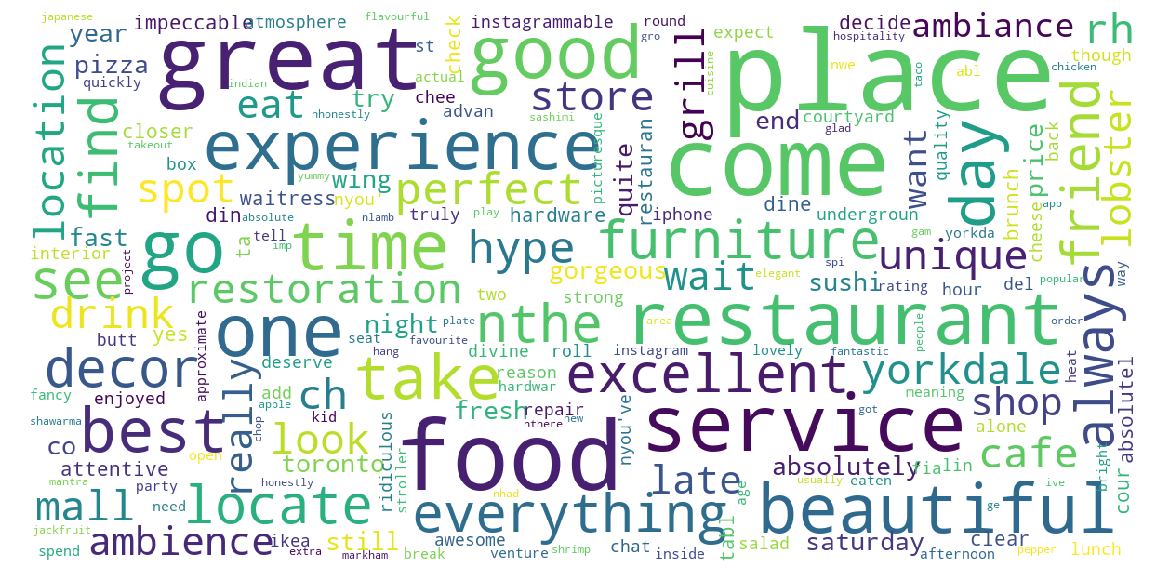

In [75]:
show_wordcloud(review_good["review_clean_text"])

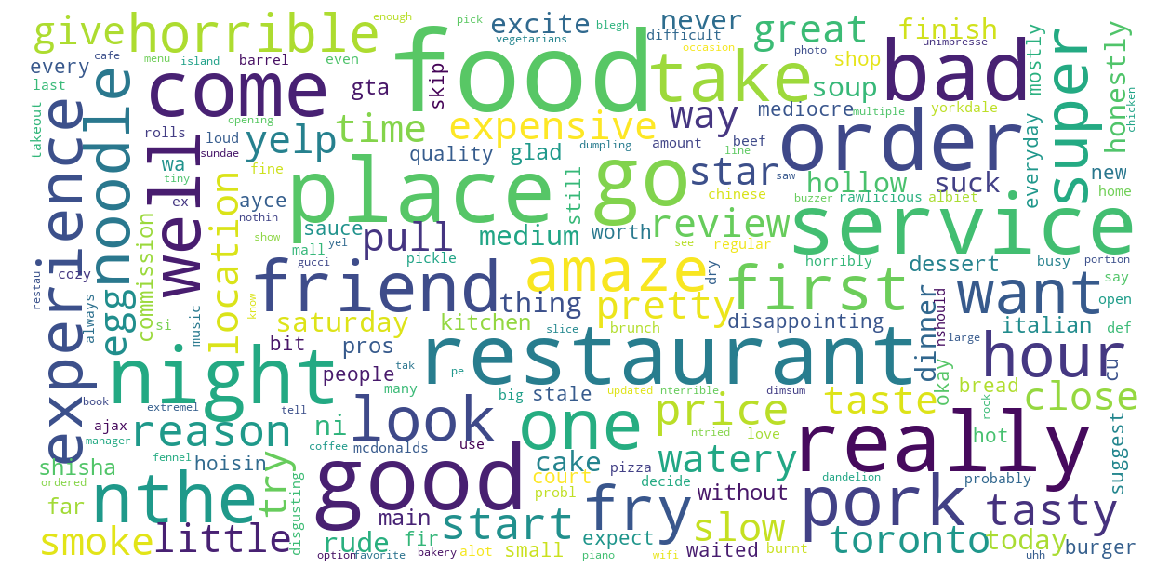

In [96]:
show_wordcloud(review_bad["review_clean_text"])